In [2]:
#Import Required Libraries
#Import the necessary libraries for data manipulation and analysis. Commonly used libraries include Pandas for data handling and NumPy for numerical operations.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the Dataset
data = pd.read_csv('supermarket_sales - Sheet1.csv')

# Dictionary to map old column names to new normalized column names
column_mapping = {
    'Invoice ID': 'invoice_id',
    'Branch': 'branch',
    'City': 'city',
    'Customer type': 'customer_type',
    'Gender': 'gender',
    'Product line': 'product_line',
    'Unit price': 'unit_price',
    'Quantity': 'quantity',
    'Tax 5%': 'tax_5_percent',
    'Total': 'total',
    'Date': 'date',
    'Time': 'time',
    'Payment': 'payment',
    'cogs': 'cogs',
    'gross margin percentage': 'gross_margin_percentage',
    'gross income': 'gross_income',
    'Rating': 'rating'
}

# Rename columns using the dictionary
data.rename(columns=column_mapping, inplace=True)

# Normalize column titles by converting to lowercase and removing leading/trailing whitespaces
data.columns = data.columns.str.strip().str.lower()

# Examine the Data
display(data.head())
display(data.shape)
display(data.info())
display(data.describe())

# Data Cleaning
data.dropna(inplace=True)  # Drop rows with missing values

# Convert date and time columns to datetime objects with specified formats
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data['time'] = pd.to_datetime(data['time'], format='%H:%M')

# Drop rows with missing values (if needed)
data.dropna(inplace=True)

# Convert 'date' column to datetime objects with ISO 8601 format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Remove duplicates
data.drop_duplicates(inplace=True)

# Save the cleaned DataFrame to a new CSV file (optional)
data.to_csv('cleaned_supermarket_sales.csv', index=False)


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


(1000, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5_percent            1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

None

,unit_price,quantity,tax_5_percent,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [4]:
#Number of city present in the dataset

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Count the number of unique cities
num_cities = data['city'].nunique()

# Get the names of unique cities
unique_cities = data['city'].unique()

display(f"Number of unique cities in the dataset: {num_cities}")
display("Unique cities:")
for city in unique_cities:
    display(city)


'Number of unique cities in the dataset: 3'

'Unique cities:'

'Yangon'

'Naypyitaw'

'Mandalay'

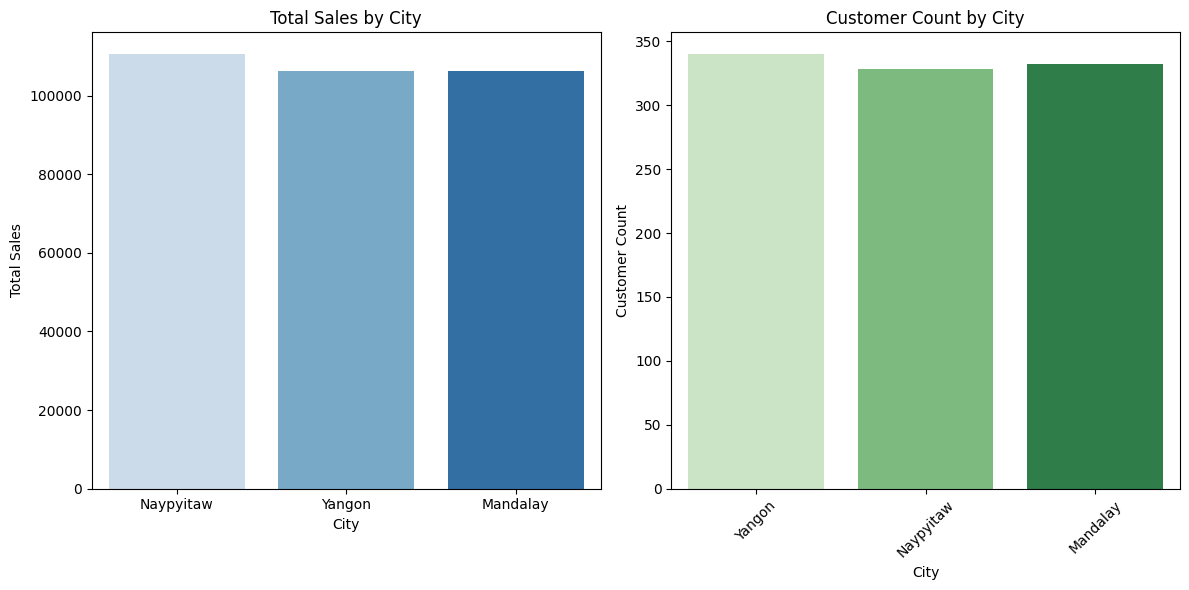

In [5]:
# 1 Sales by City: Analyze total sales and customer count for each city to identify the most profitable and active location. (seaborn)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Calculate total sales for each city
total_sales_by_city = data.groupby('city')['total'].sum().sort_values(ascending=False)

# Calculate customer count for each city
customer_count_by_city = data['city'].value_counts().sort_values(ascending=False)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot total sales by city (Bar Chart)
sns.barplot(x=total_sales_by_city.index, y=total_sales_by_city.values, ax=axes[0], palette='Blues')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Total Sales')
axes[0].set_title('Total Sales by City')

# Plot customer count by city (Count Plot)
sns.countplot(x=data['city'], ax=axes[1], palette='Greens')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Customer Count')
axes[1].set_title('Customer Count by City')

# Rotate the x-axis labels on the second plot for better visibility
axes[1].tick_params(axis='x', rotation=45)

# Adjust spacing between the subplots
plt.tight_layout()

# Display the plots
plt.show()

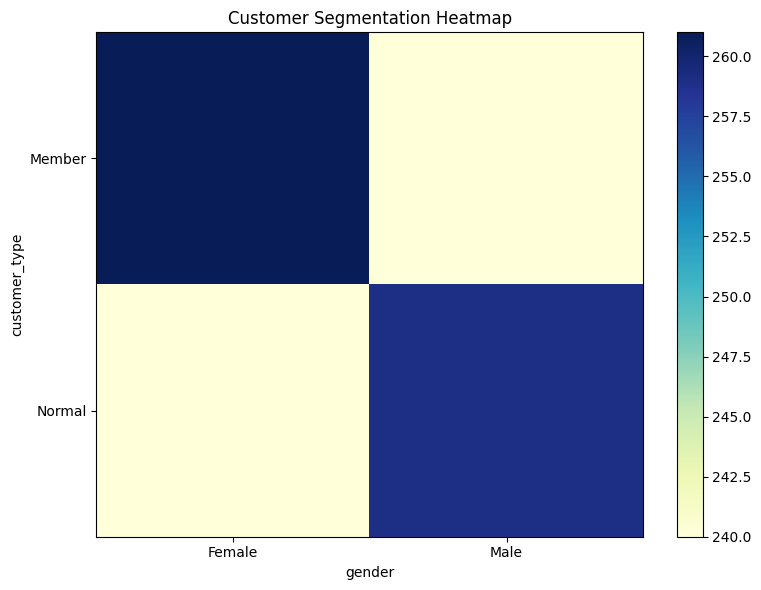

In [6]:
# 2 Customer Segmentation: Segment customers based on 'customer_type', 'gender', or other factors to understand buying behavior and preferences. (Matplotlib)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Select the columns for customer segmentation
columns_to_segment = ['customer_type', 'gender']  # Add more columns as needed for further segmentation

# Create a cross-tabulation to count the occurrences of each combination
cross_tab = pd.crosstab(data[columns_to_segment[0]], data[columns_to_segment[1]])

# Set up the heatmap plot using Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Create the heatmap
heatmap = ax.imshow(cross_tab, cmap='YlGnBu', aspect='auto')

# Add the colorbar
cbar = plt.colorbar(heatmap)

# Add labels and title
ax.set_xticks(range(len(cross_tab.columns)))
ax.set_xticklabels(cross_tab.columns)
ax.set_yticks(range(len(cross_tab.index)))
ax.set_yticklabels(cross_tab.index)
plt.xlabel(columns_to_segment[1])
plt.ylabel(columns_to_segment[0])
plt.title('Customer Segmentation Heatmap')

# Display the plot
plt.tight_layout()
plt.show()


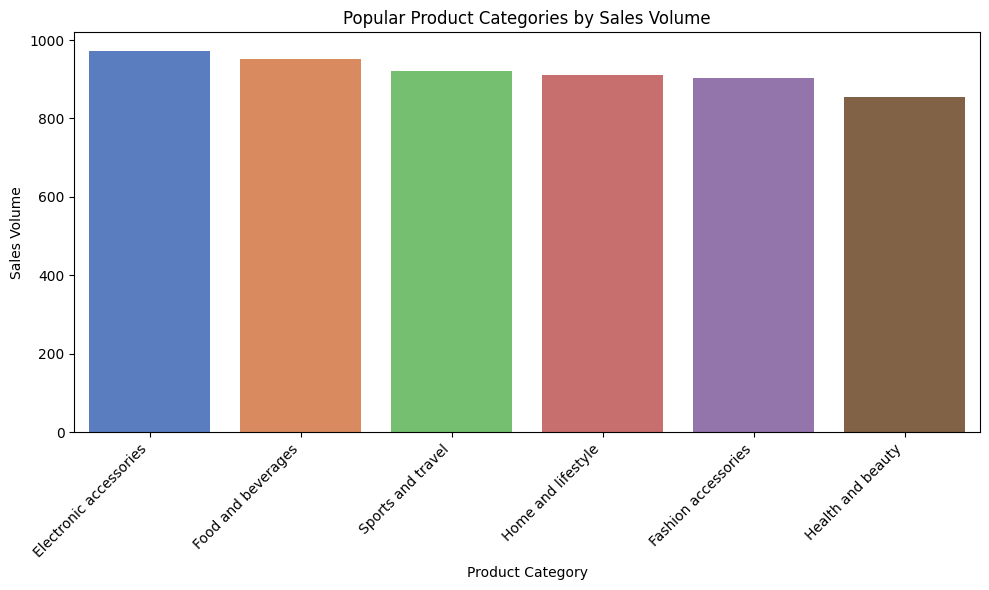

In [7]:
# 3 Popular Product Categories: Determine the most popular product categories ('product_line') by analyzing their sales volumes. (Seaborn)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Calculate sales volume for each product category ('product_line')
sales_volume_by_category = data.groupby('product_line')['quantity'].sum().sort_values(ascending=False)

# Create a bar plot for popular product categories
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_volume_by_category.index, y=sales_volume_by_category.values, palette='muted')

# Add labels, title, and rotate x-axis labels for better readability
plt.xlabel('Product Category')
plt.ylabel('Sales Volume')
plt.title('Popular Product Categories by Sales Volume')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


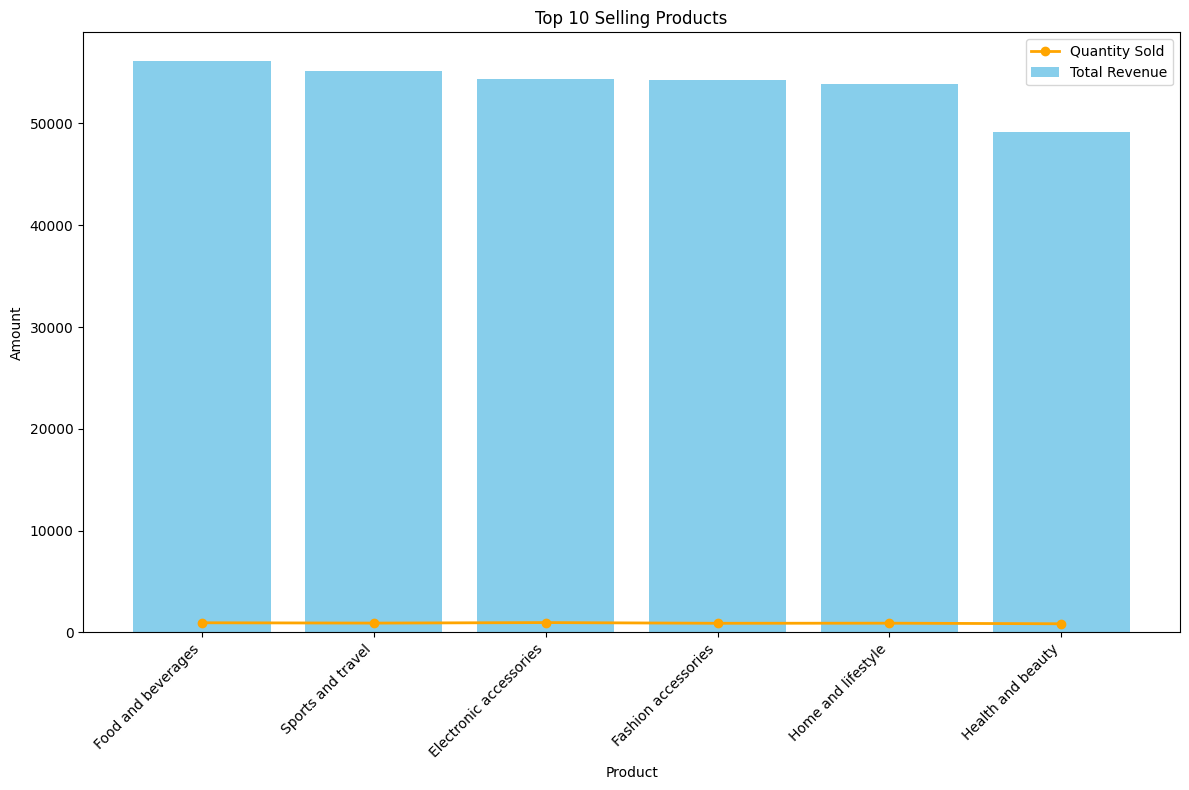

In [8]:
#4 Top Selling Products: Identify the top-selling individual products by analyzing the quantity sold and total revenue generated. (Matplotlib)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Calculate total revenue generated for each product ('product_line')
total_revenue_by_product = data.groupby('product_line')['total'].sum().sort_values(ascending=False)

# Calculate quantity sold for each product ('product_line')
quantity_sold_by_product = data.groupby('product_line')['quantity'].sum().sort_values(ascending=False)

# Merge the two Series into a single DataFrame
top_products = pd.DataFrame({'Total Revenue': total_revenue_by_product, 'Quantity Sold': quantity_sold_by_product})

# Sort the DataFrame by total revenue in descending order to get the top-selling products
top_products = top_products.sort_values(by='Total Revenue', ascending=False)

# Take the top 10 products (you can adjust the number as per your preference)
top_10_products = top_products.head(10)

# Create a combined bar and line chart for the top-selling products
plt.figure(figsize=(12, 8))

# Plot the total revenue as a bar chart
plt.bar(top_10_products.index, top_10_products['Total Revenue'], color='skyblue', label='Total Revenue')

# Plot the quantity sold as a line chart on the same plot
plt.plot(top_10_products.index, top_10_products['Quantity Sold'], marker='o', color='orange', linewidth=2, label='Quantity Sold')

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Amount')
plt.title('Top 10 Selling Products')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()



In [9]:
# Let's check what is the most commun year in the dataset

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Convert the 'date' column to datetime objects (if not already done)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Extract the year from each date
data['year'] = data['date'].dt.year

# Count the occurrences of each unique year
year_counts = data['year'].value_counts()

# Find the most common year
most_common_year = year_counts.idxmax()

print("The most common year is:", most_common_year)


The most common year is: 2019


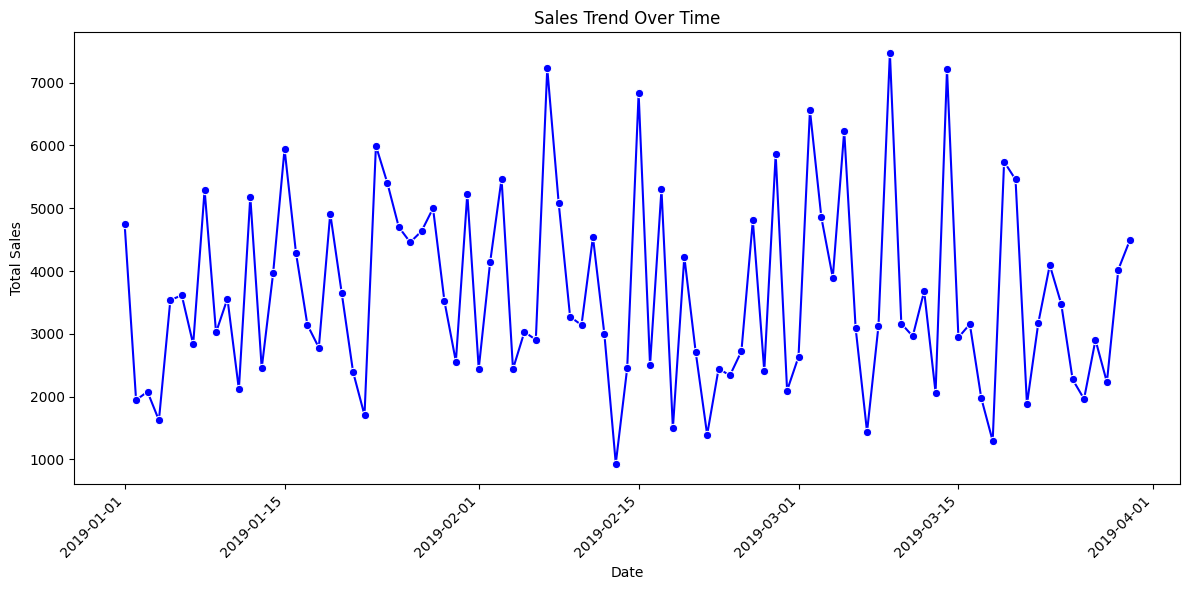

In [10]:
# 5 Sales Trend: Analyze sales trends over time to identify seasonal patterns and fluctuations. (seaborn)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Convert the 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Group the data by date and calculate total sales for each date
sales_by_date = data.groupby('date')['total'].sum()

# Create the sales trend line plot using Seaborn (without explicitly calling lineplot)
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_date.index, y=sales_by_date.values, marker='o', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


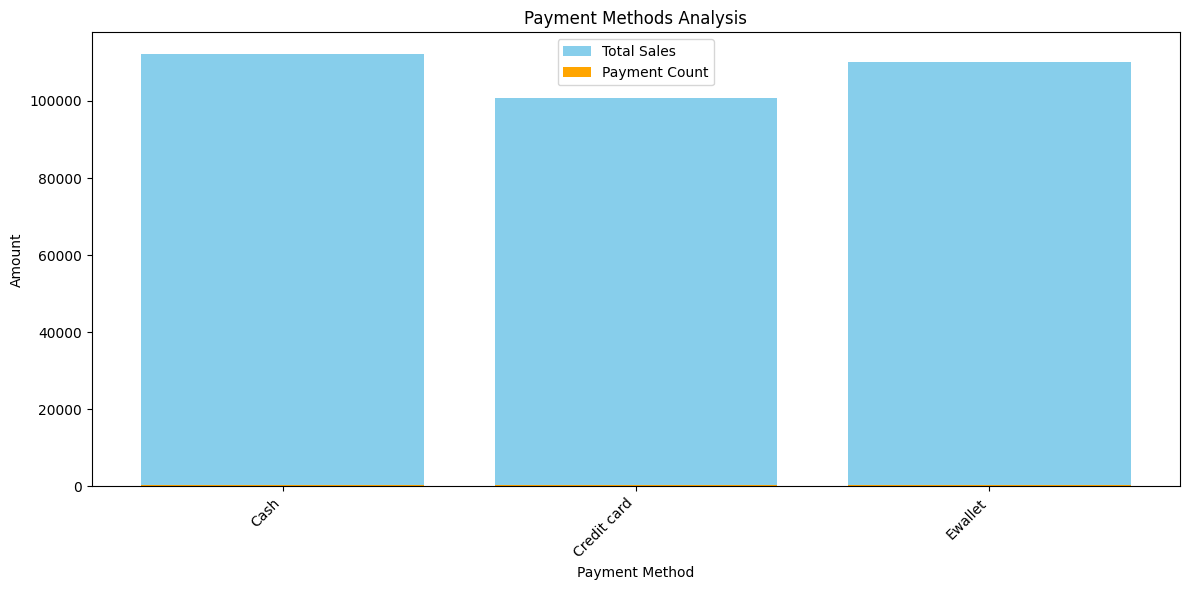

In [11]:
#6 Payment Methods Analysis: Evaluate the distribution of payment methods used by customers and their impact on sales.(matplotilib)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Group the data by payment method and calculate total sales for each method
sales_by_payment_method = data.groupby('payment')['total'].sum()
count_by_payment_method = data['payment'].value_counts()

# Create a bar chart for payment methods and their total sales
plt.figure(figsize=(12, 6))
plt.bar(sales_by_payment_method.index, sales_by_payment_method.values, color='skyblue', label='Total Sales')
plt.bar(count_by_payment_method.index, count_by_payment_method.values, color='orange', label='Payment Count')

# Add labels and title
plt.xlabel('Payment Method')
plt.ylabel('Amount')
plt.title('Payment Methods Analysis')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


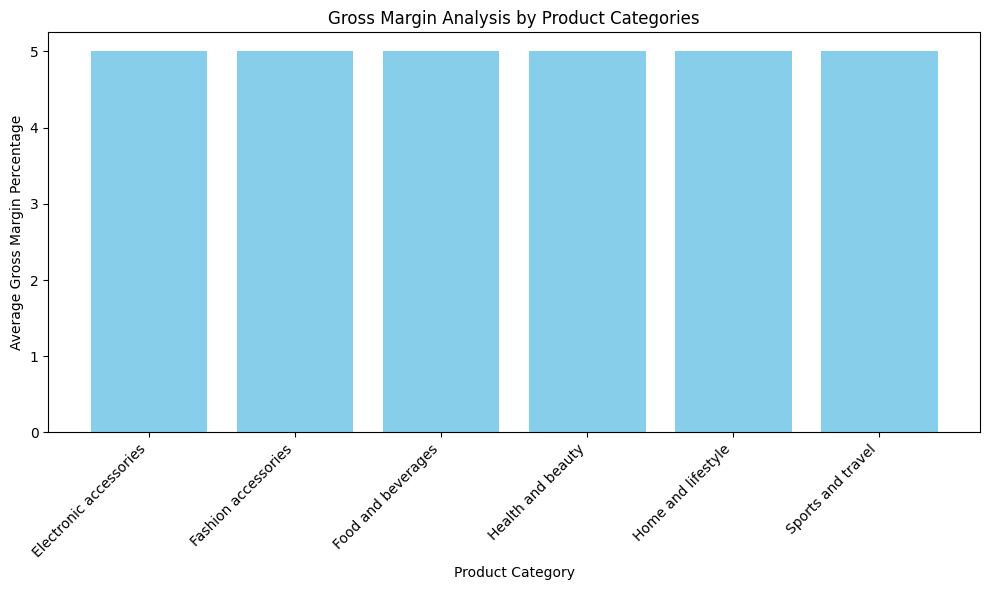

In [12]:
#7 Gross Margin Analysis: Investigate the gross margin percentage by product categories to understand profitability.(matplotlib)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Calculate the gross margin percentage for each product category
data['gross_margin_percentage'] = (data['gross_income'] / data['cogs']) * 100

# Group data by product category and calculate the average gross margin percentage for each category
product_category_data = data.groupby('product_line')['gross_margin_percentage'].mean().reset_index()

# Sort the data by gross margin percentage in descending order
product_category_data = product_category_data.sort_values(by='gross_margin_percentage', ascending=False)

# Set up the bar chart plot
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(product_category_data['product_line'], product_category_data['gross_margin_percentage'], color='skyblue')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Average Gross Margin Percentage')
plt.title('Gross Margin Analysis by Product Categories')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

plt.show()


Negative gross margin indicates that the company is not making a profit from selling products in that category.

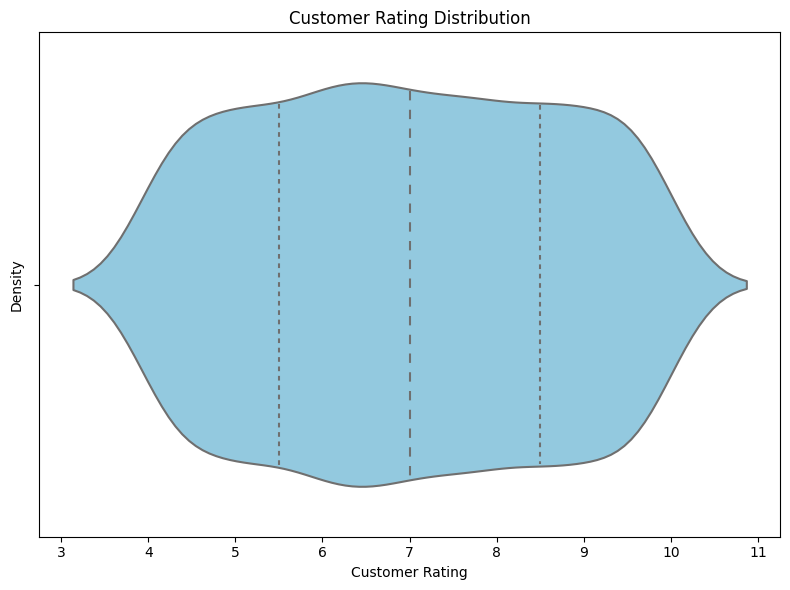

In [13]:
#8 Customer Rating Analysis: Examine the distribution of customer ratings to gauge customer satisfaction. (seaborn)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Create a violin plot of customer ratings
plt.figure(figsize=(8, 6))
sns.violinplot(x='rating', data=data, color='skyblue', inner='quartile')
plt.xlabel('Customer Rating')
plt.ylabel('Density')
plt.title('Customer Rating Distribution')
plt.tight_layout()
plt.show()



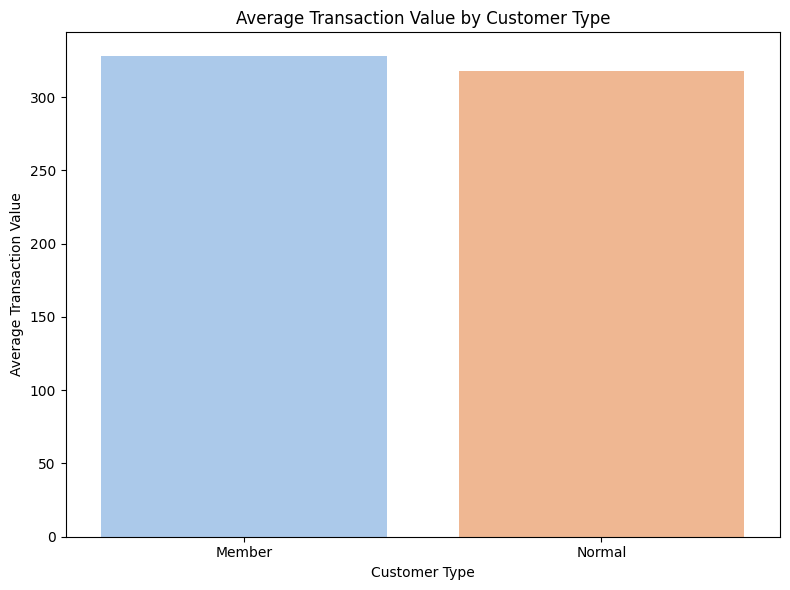

In [14]:
#9 Average Transaction Value: Calculate the average transaction value to understand customer spending patterns. (seaborn)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Calculate the average transaction value for each customer type
average_transaction_value = data.groupby('customer_type')['total'].mean()

# Create a bar plot for average transaction value
plt.figure(figsize=(8, 6))
sns.barplot(x=average_transaction_value.index, y=average_transaction_value.values, palette='pastel')
plt.xlabel('Customer Type')
plt.ylabel('Average Transaction Value')
plt.title('Average Transaction Value by Customer Type')
plt.tight_layout()
plt.show()


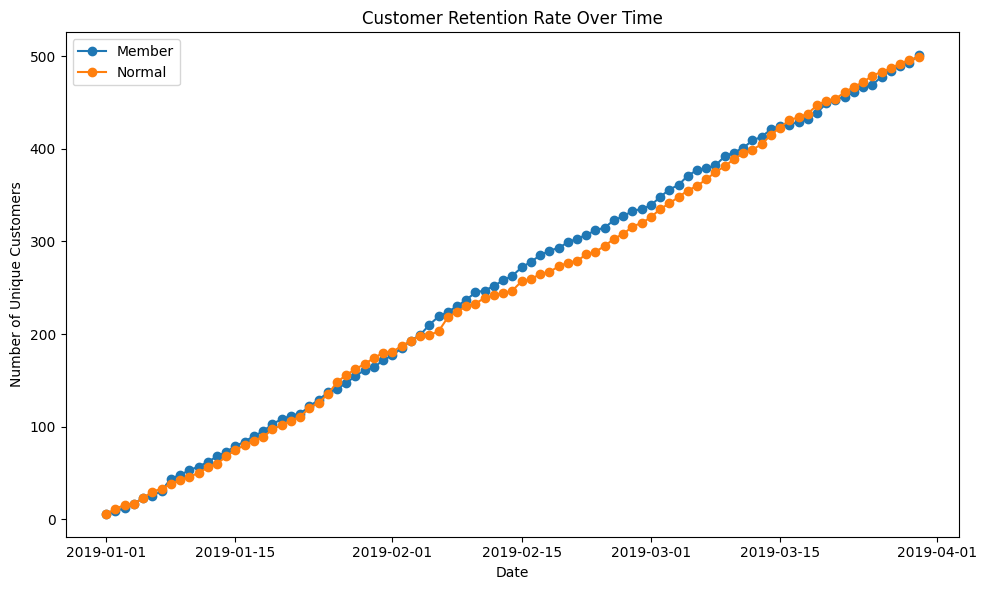

In [15]:
#10 Customer Retention Rate: Analyze the number of repeat customers to measure customer loyalty and retention.(matplotlib)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Convert the 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'])

# Group the data by date and customer type, and calculate the number of unique customers
customer_retention_data = data.groupby(['date', 'customer_type'])['invoice_id'].nunique().reset_index()

# Pivot the data to have customer types as columns and dates as rows
customer_retention_pivot = customer_retention_data.pivot(index='date', columns='customer_type', values='invoice_id').fillna(0)

# Calculate the cumulative sum of unique customers for each customer type
customer_retention_pivot['Member Cumulative'] = customer_retention_pivot['Member'].cumsum()
customer_retention_pivot['Normal Cumulative'] = customer_retention_pivot['Normal'].cumsum()

# Create a line plot for customer retention rate
plt.figure(figsize=(10, 6))
plt.plot(customer_retention_pivot.index, customer_retention_pivot['Member Cumulative'], label='Member', marker='o')
plt.plot(customer_retention_pivot.index, customer_retention_pivot['Normal Cumulative'], label='Normal', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Unique Customers')
plt.title('Customer Retention Rate Over Time')
plt.legend()
plt.tight_layout()
plt.show()




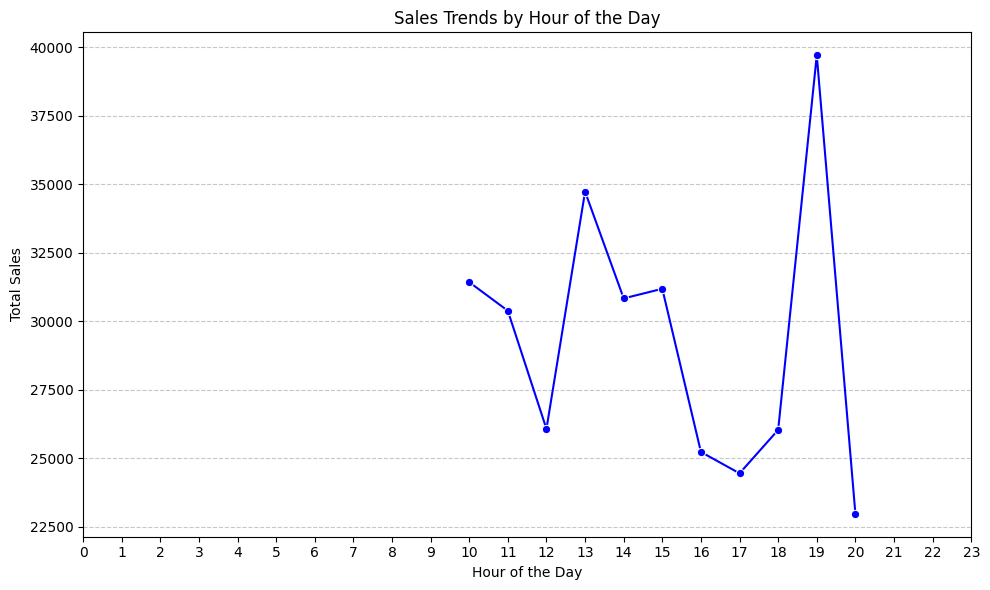

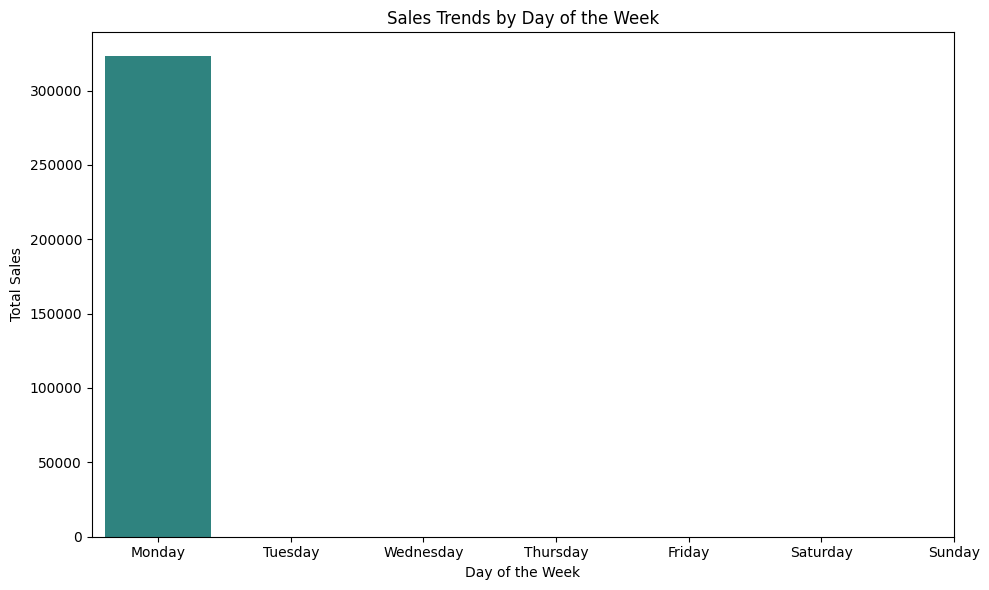

In [16]:
#12 Time Analysis: Study sales trends based on the time of day or day of the week to optimize staffing and promotions.(seaborn)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Convert the 'time' column to datetime objects
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')

# Extract hour and day of the week from the 'time' column
data['hour'] = data['time'].dt.hour
data['day_of_week'] = data['time'].dt.dayofweek

# Group the data by hour and calculate total sales for each hour
sales_by_hour = data.groupby('hour')['total'].sum()

# Group the data by day of the week and calculate total sales for each day
sales_by_day_of_week = data.groupby('day_of_week')['total'].sum()

# Create a line plot for sales trends by hour
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker='o', color='b')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Sales Trends by Hour of the Day')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a bar plot for sales trends by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day_of_week.index, y=sales_by_day_of_week.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Sales Trends by Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.show()



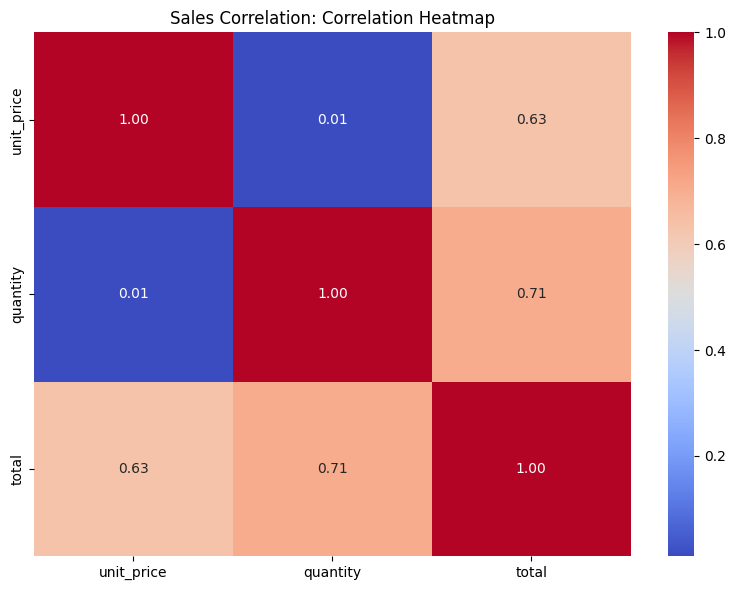

In [17]:
#12 Sales Correlation: Explore correlations between variables like 'unit_price', 'quantity', and 'total' to identify any patterns (matplotlib)

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Select the relevant numerical columns for the correlation heatmap
numerical_columns = ['unit_price', 'quantity', 'total']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Set up the heatmap plot using Seaborn
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Sales Correlation: Correlation Heatmap')

# Display the plot
plt.tight_layout()
plt.show()




In [18]:
#Sales by City: 
# To analyze total sales and customer count for each city, we can use a pivot table to group the data by 'city' and calculate the total sales and customer count for each city.

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Create a pivot table for Sales by City
sales_by_city = data.pivot_table(index='city', values='total', aggfunc=('sum', 'count'))

# Rename the columns for clarity
sales_by_city.columns = ['Total Sales', 'Customer Count']

display(sales_by_city)


,Total Sales,Customer Count
city,,
Mandalay,332,106197.6720
Naypyitaw,328,110568.7065
Yangon,340,106200.3705


In [19]:
 #Customer Segmentation: 
#To segment customers based on 'customer_type', 'gender', or other factors, we can use a cross-tabulation to count the occurrences of different combinations of factors.

# Create a cross-tabulation for Customer Segmentation
customer_segmentation = pd.crosstab(index=data['customer_type'], columns=data['gender'])

display(customer_segmentation)


gender,Female,Male
customer_type,,
Member,261,240
Normal,240,259


In [20]:
#Popular Product Categories: 
#To determine the most popular product categories ('product_line'), we can use a pivot table to calculate the total sales volume for each product category.

# Create a pivot table for Popular Product Categories
popular_product_categories = data.pivot_table(index='product_line', values='total', aggfunc='sum')

display(popular_product_categories)



,total
product_line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [21]:
# Top Selling Products: 
#To identify the top-selling individual products, we can use a pivot table to group the data by 'product_line' and calculate the total quantity sold and total revenue generated for each product line.

# Create a pivot table for Top Selling Products
top_selling_products = data.pivot_table(index='product_line', values=['quantity', 'total'], aggfunc={'quantity': 'sum', 'total': 'sum'})

display(top_selling_products)



,quantity,total
product_line,,
Electronic accessories,971,54337.5315
Fashion accessories,902,54305.8950
Food and beverages,952,56144.8440
Health and beauty,854,49193.7390
Home and lifestyle,911,53861.9130
Sports and travel,920,55122.8265


In [22]:
#Sales Trend: 
#To analyze sales trends over time, we can use a pivot table to group the data by date and calculate the total sales for each date.

# Convert the 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'])

# Create a pivot table for Sales Trend
sales_trend = data.pivot_table(index='date', values='total', aggfunc='sum')

display(sales_trend)



,total
date,
2019-01-01,4745.1810
2019-01-02,1945.5030
2019-01-03,2078.1285
2019-01-04,1623.6885
2019-01-05,3536.6835
...,...
2019-03-26,1962.5130
2019-03-27,2902.8195
2019-03-28,2229.4020


In [23]:
#Payment Methods Analysis: 
#To evaluate the distribution of payment methods used by customers and their impact on sales, we can use a cross-tabulation to count the occurrences of different payment methods.

# Create a cross-tabulation for Payment Methods Analysis
payment_methods_analysis = pd.crosstab(index=data['payment'], columns=data['customer_type'], values=data['total'], aggfunc='sum')

display(payment_methods_analysis)


customer_type,Member,Normal
payment,,
Cash,54661.0155,57545.5545
Credit card,57771.4725,42995.5995
Ewallet,51790.9560,58202.1510


In [24]:
#Gross Margin Analysis: 
#To investigate the gross margin percentage for different product categories, we can use a pivot table to group the data by 'product_line' and calculate the average gross margin percentage for each product category.

# Create a pivot table for Gross Margin Analysis
gross_margin_analysis = data.pivot_table(index='product_line', values='gross_margin_percentage', aggfunc='mean')

display(gross_margin_analysis)


,gross_margin_percentage
product_line,
Electronic accessories,4.761905
Fashion accessories,4.761905
Food and beverages,4.761905
Health and beauty,4.761905
Home and lifestyle,4.761905
Sports and travel,4.761905


In [25]:
#Customer Rating Analysis: 
#To examine the distribution of customer ratings, we can use a pivot table to calculate the count of ratings for each rating value.

# Create a pivot table for Customer Rating Analysis
customer_rating_analysis = data.pivot_table(index='rating', values='invoice_id', aggfunc='count')

display(customer_rating_analysis)


,invoice_id
rating,
4.0,11
4.1,17
4.2,22
4.3,18
4.4,17
...,...
9.6,17
9.7,14
9.8,19


In [26]:
#Average Transaction Value: 
#To calculate the average transaction value, we can use a pivot table to group the data by 'invoice_id' and calculate the average total for each transaction.

# Create a pivot table for Average Transaction Value
average_transaction_value = data.pivot_table(index='invoice_id', values='total', aggfunc='mean')

display(average_transaction_value)


,total
invoice_id,
101-17-6199,336.5565
101-81-4070,131.9220
102-06-2002,132.5625
102-77-2261,480.0285
105-10-6182,45.1080
...,...
894-41-5205,362.7120
895-03-6665,345.0195
895-66-0685,56.9520


In [27]:
#Customer Retention Rate: 
#To analyze the number of repeat customers, we can use a pivot table to group the data by 'customer_type' and calculate the count of unique 'invoice_id' for each customer type.

# Create a pivot table for Customer Retention Rate
customer_retention_rate = data.pivot_table(index='customer_type', values='invoice_id', aggfunc='nunique')

display(customer_retention_rate)


,invoice_id
customer_type,
Member,501
Normal,499


In [28]:
#Time Analysis: 
#To study sales trends based on the time of day or day of the week, we can use a pivot table to group the data by 'hour' and 'day_of_week' and calculate the total sales for each hour and day.

# Extract hour and day of the week from the 'time' column
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['day_of_week'] = data['time'].dt.dayofweek

# Create a pivot table for Time Analysis by hour
time_analysis_by_hour = data.pivot_table(index='hour', values='total', aggfunc='sum')

# Create a pivot table for Time Analysis by day of the week
time_analysis_by_day_of_week = data.pivot_table(index='day_of_week', values='total', aggfunc='sum')

display(time_analysis_by_hour)
display(time_analysis_by_day_of_week)


,total
hour,
10,31421.4810
11,30377.3295
12,26065.8825
13,34723.2270
14,30828.3990
15,31179.5085
16,25226.3235
17,24445.2180
18,26030.3400


,total
day_of_week,
0,322966.749


In [29]:
#Sales Correlation: 
#To explore correlations between variables like 'unit_price', 'quantity', and 'total', we can use a correlation matrix to calculate the correlation coefficients

# Select the columns for correlation analysis
correlation_data = data[['unit_price', 'quantity', 'total']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

display(correlation_matrix)


,unit_price,quantity,total
unit_price,1.000000,0.010778,0.633962
quantity,0.010778,1.000000,0.705510
total,0.633962,0.705510,1.000000


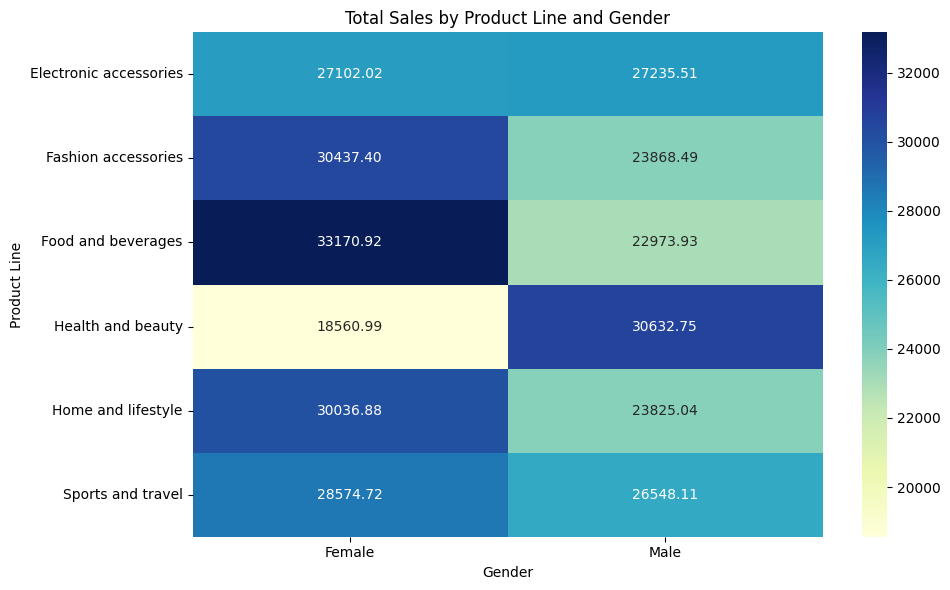

In [30]:
#Total sales by product line and gender pivot table and seaborn

# Read the cleaned data from the CSV file
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Create a pivot table to calculate the sum of 'total' for each combination of 'product_line' and 'gender'
pivot_table = data.pivot_table(index='product_line', columns='gender', values='total', aggfunc='sum')

# Set up the heatmap plot using Seaborn
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Product Line')
plt.title('Total Sales by Product Line and Gender')

# Display the plot
plt.tight_layout()
plt.show()


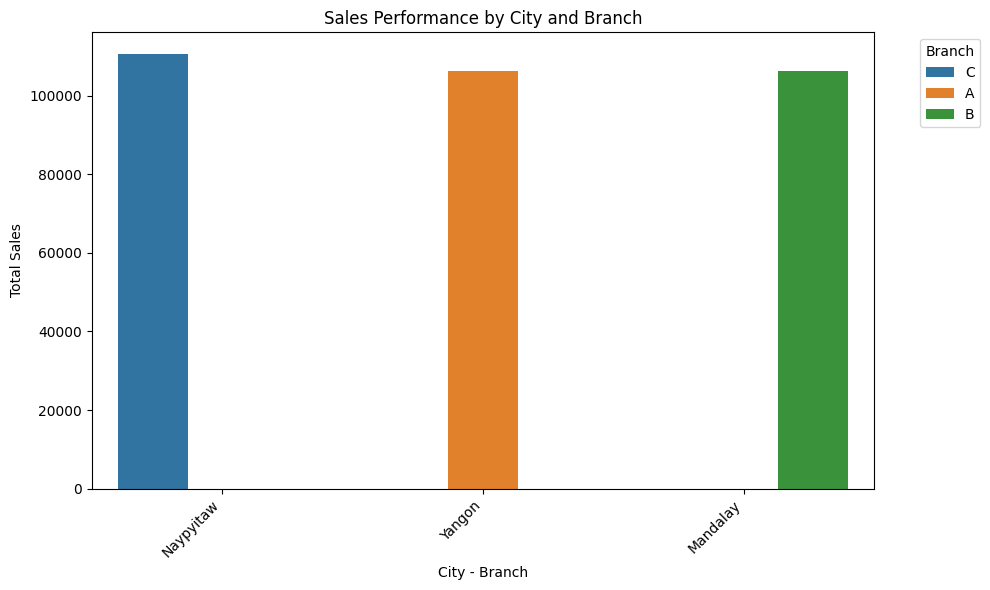

In [37]:
# Sales Performance by City and Branch

# Load the Dataset
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Group the data by 'City' and 'Branch', and calculate total sales and customer count
sales_by_city_branch = data.groupby(['city', 'branch']).agg({
    'total': 'sum',
    'invoice_id': 'nunique'  # Counting unique invoice_ids to get the number of customers
}).reset_index()

# Optionally, calculate average sales per customer
sales_by_city_branch['Average Sales per Customer'] = sales_by_city_branch['total'] / sales_by_city_branch['invoice_id']

# Sort the data by total sales in descending order for the chart
sales_by_city_branch.sort_values(by='total', ascending=False, inplace=True)

# Plot the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='total', hue='branch', data=sales_by_city_branch)
plt.xlabel('City - Branch')
plt.ylabel('Total Sales')
plt.title('Sales Performance by City and Branch')
plt.xticks(rotation=45, ha='right')

# Move the legend to the upper left corner outside the plot
plt.legend(title='Branch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




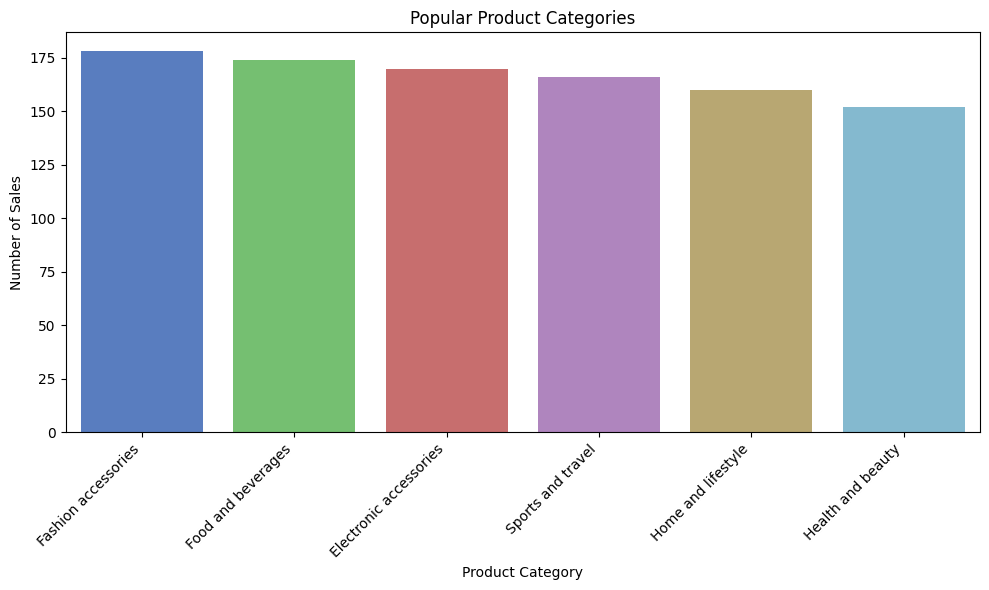

In [41]:
# Popular Product Categories matplotlib

# Load the Dataset
data = pd.read_csv('cleaned_supermarket_sales.csv')

# Group the data by 'Product line', and calculate the count of each product category
popular_product_categories = data['product_line'].value_counts().reset_index()
popular_product_categories.columns = ['Product Line', 'Count']

# Sort the data by count in descending order for the chart
popular_product_categories.sort_values(by='Count', ascending=False, inplace=True)

# Define a custom color palette
custom_palette = ['#4878d0', '#6acc64', '#d65f5f', '#b47cc7', '#c4ad66', '#77bedb']

# Plot the count plot using Seaborn with the custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Line', y='Count', data=popular_product_categories, palette=custom_palette)
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.title('Popular Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

